In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from matplotlib.dates import MonthLocator, DateFormatter
from utilities import filterout, normalize,get_common_dates
#import QuantLib as ql

In [19]:
filenames = [ "IG","HY","SPX"]

# Store each series in a mapping from filename to dataframe
dfs = {
    fn: pd.read_csv(f"{fn}.csv", parse_dates=["Date"]) for fn in filenames
}
# Get the intersection of the time series data relative to common dates
date_index = get_common_dates(dfs,filenames)
common_date_dfs = {
    fn: dfs[fn][date_index[fn]] for fn in filenames
}
# Set the index of the dataframes to be the dates
for key in common_date_dfs.keys():
    common_date_dfs[key] = common_date_dfs[key].set_index("Date")
    
# Normalized time series
normalized_series = {
    fn: normalize(common_date_dfs[fn][fn]) for fn in filenames
}

#convert date into stationary series
stationary_series = {
    fn:np.diff(np.log(common_date_dfs[fn][fn])) for fn in filenames
}


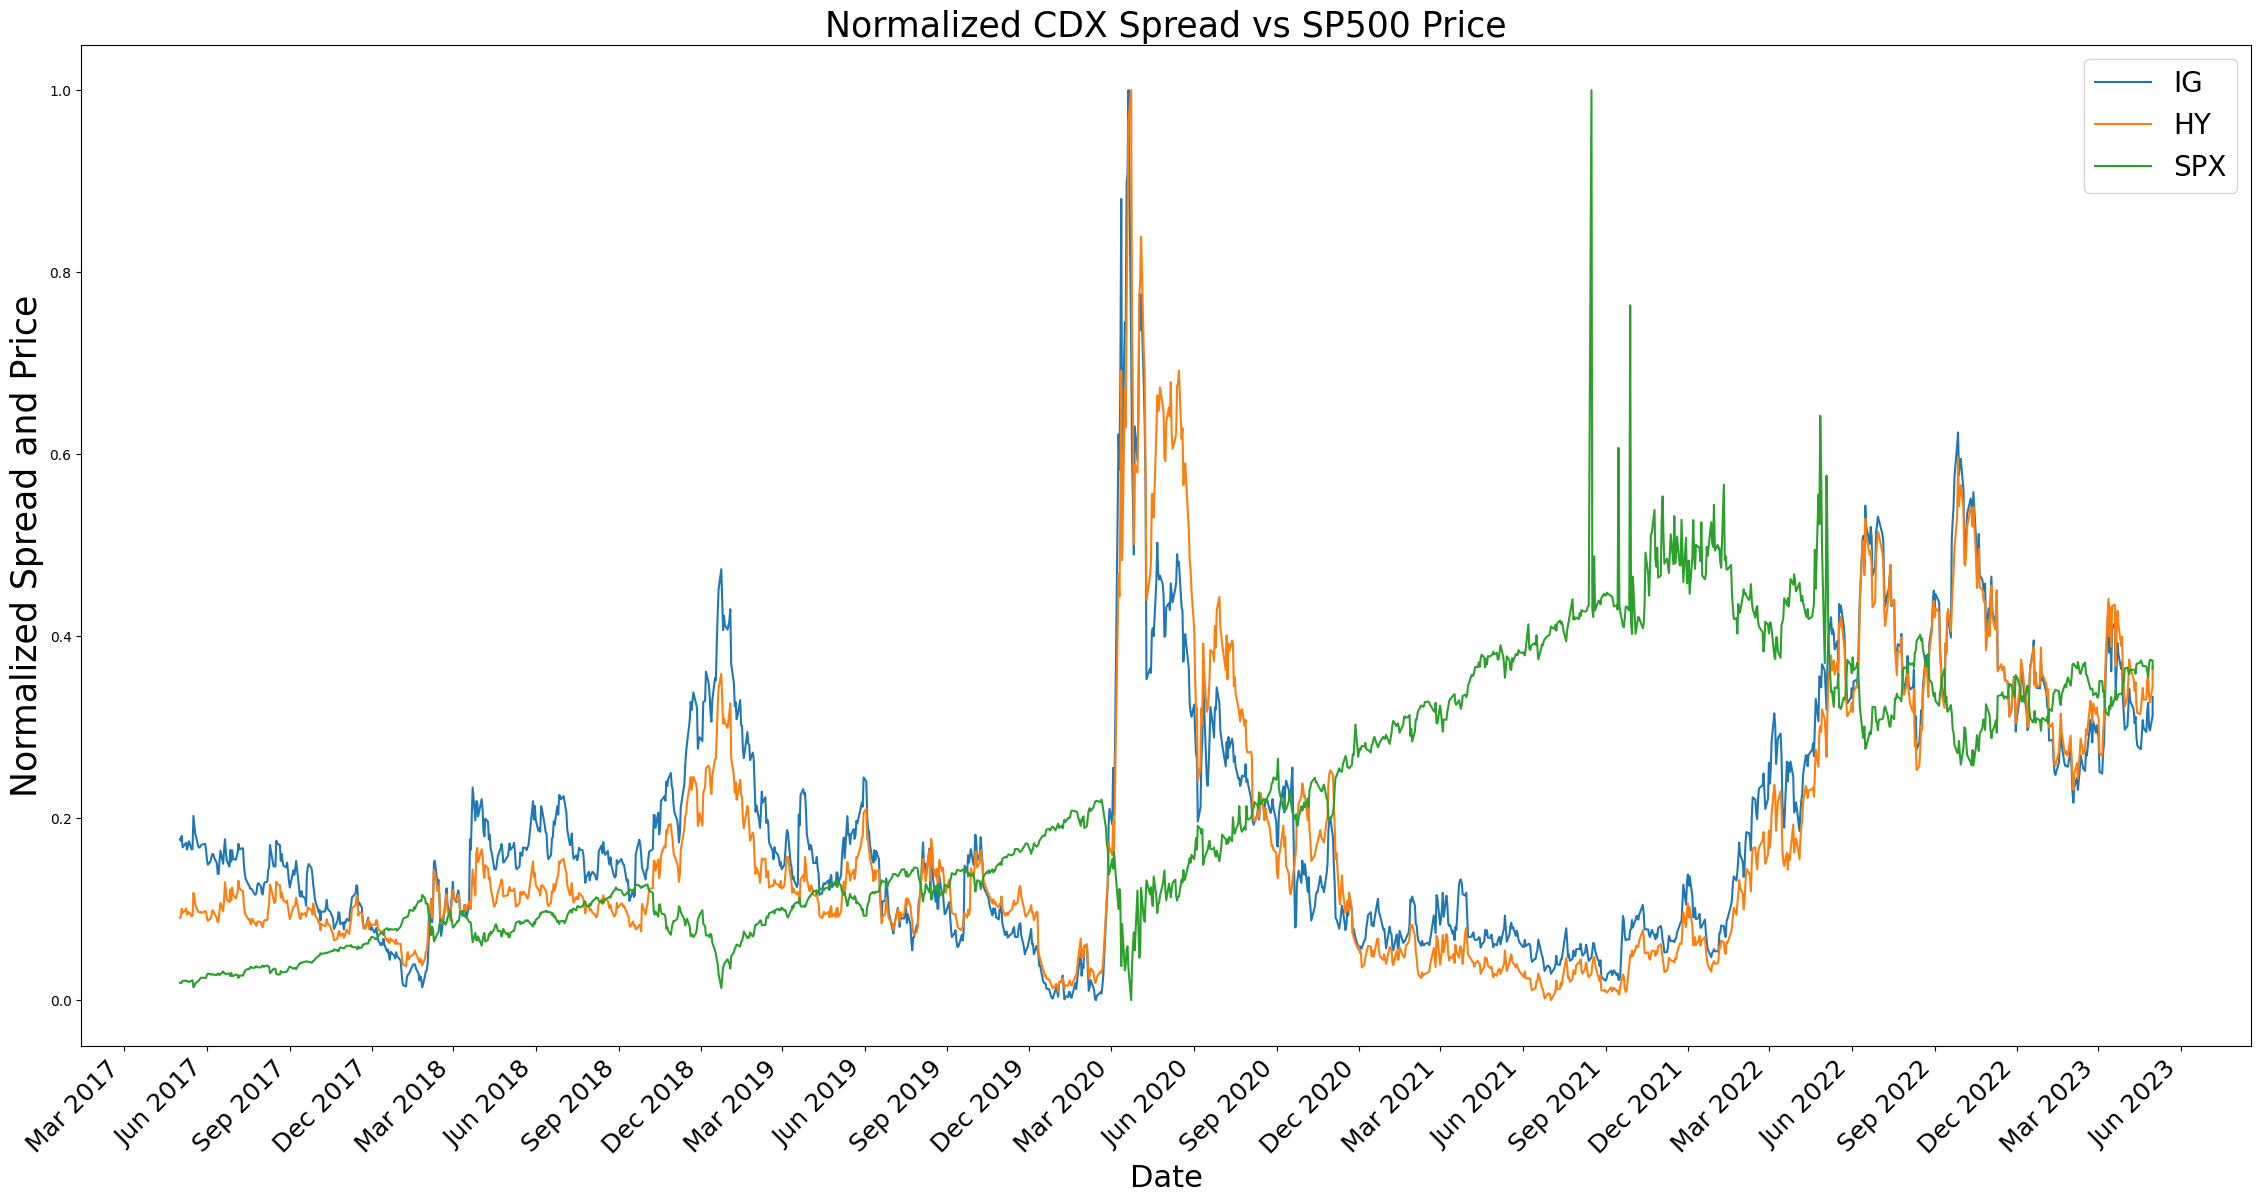

In [20]:
data = ['IG','HY','SPX']
fig, ax = plt.subplots(figsize=(28, 13))
[ax.plot(common_date_dfs[label].index, normalized_series[label], label=label) for label in data]
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right',fontsize=18)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Normalized Spread and Price',fontsize = 25)
plt.title('Normalized CDX Spread vs SP500 Price',fontsize = 25)
plt.legend(fontsize=20)
#plt.savefig('normalized_spread')
plt.show()

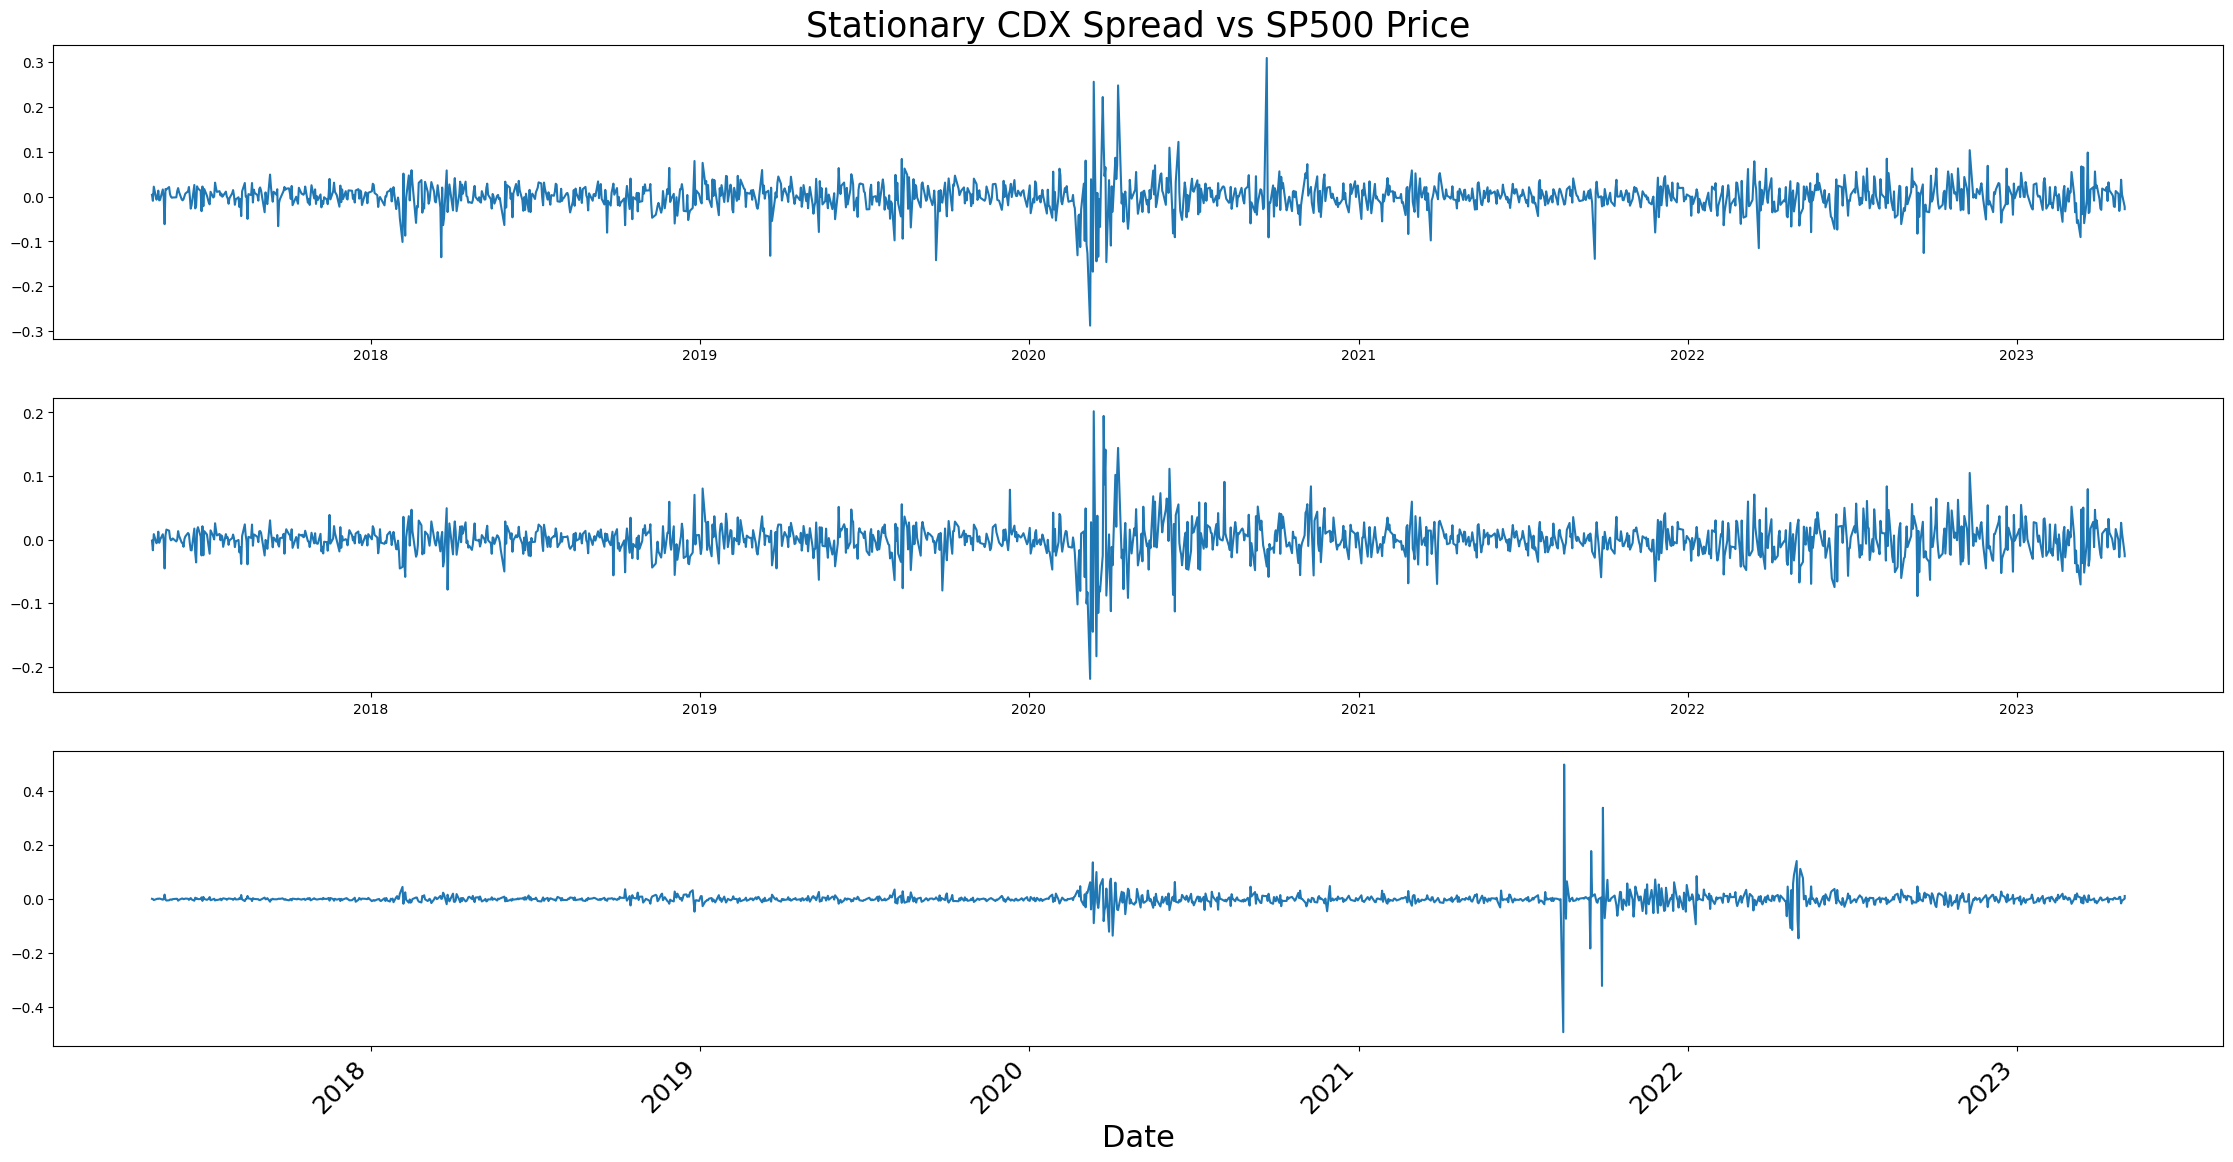

In [27]:
data = ['IG','HY','SPX']
fig, ax = plt.subplots(3,figsize=(28, 13))
[ax[i].plot(common_date_dfs[data[i]].index[:-1], stationary_series[data[i]], label=data[i]) for i in range(len(data))]
#ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(MonthLocator(interval=3))
#ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right',fontsize=18)
plt.xlabel('Date',fontsize = 22)
#plt.ylabel('Stationary Spread and Price',fontsize = 25)
ax[0].set_title('Stationary CDX Spread vs SP500 Price',fontsize = 25)
#plt.legend(fontsize=20)
#plt.savefig('normalized_spread')
plt.show()

In [22]:
common_date_dfs['IG'].index[:-1]

DatetimeIndex(['2023-05-01', '2023-05-01', '2023-04-28', '2023-04-27',
               '2023-04-26', '2023-04-25', '2023-04-24', '2023-04-21',
               '2023-04-20', '2023-04-19',
               ...
               '2017-05-16', '2017-05-15', '2017-05-12', '2017-05-11',
               '2017-05-10', '2017-05-09', '2017-05-08', '2017-05-05',
               '2017-05-04', '2017-05-03'],
              dtype='datetime64[ns]', name='Date', length=1499, freq=None)